In [1]:
# importing the required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from time import perf_counter 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
import cv2
import numpy as np

In [2]:
# Defining the paths to the data folders
train_dir = '../data/train'
test_dir = '../data/test'
valid_dir = '../data/valid'

In [3]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load the train data
train_data = datagen.flow_from_directory(train_dir, 
                                         target_size=(224, 224), # Adjust to your image size
                                         class_mode='categorical',)

# Load the validation data
valid_data = datagen.flow_from_directory(valid_dir, 
                                         target_size=(224, 224), 
                                         class_mode='categorical')

# Load the test data
test_data = datagen.flow_from_directory(test_dir, 
                                        target_size=(224, 224), 
                                        class_mode='categorical', 
                                        shuffle=False)  # No need to shuffle test data

Found 1300 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Found 26 images belonging to 13 classes.


In [5]:
from keras.layers import Input, BatchNormalization, Dropout

In [6]:
model = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(axis=1),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=128,activation='relu'),
    BatchNormalization(axis=1),
    Dropout(0.5),
    Dense(units=13,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 128)  │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,770,253 (98.31 MB)

 Trainable params: 25,769,773 (98.30 MB)

 Non-trainable params: 480 (1.88 KB)

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"],
              )

In [11]:
import keras

In [12]:
epochs = 50
checkpoint_filepath = '../models/checkpoint.model.keras'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

accuracy_metrics = model.fit(
    x=train_data,
    epochs=epochs,
    validation_data=valid_data,
    batch_size=20,
    callbacks=[model_checkpoint_callback])

Epoch 1/50


c:\Users\admin\dataScienceBootcamp\my_eda_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 364s 8s/step - accuracy: 0.1905 - loss: 2.6648 - val_accuracy: 0.0769 - val_loss: 3.3200
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.4674 - loss: 1.6794 - val_accuracy: 0.0769 - val_loss: 5.5351
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 301s 7s/step - accuracy: 0.7743 - loss: 0.8459 - val_accuracy: 0.0769 - val_loss: 7.7725
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 281s 7s/step - accuracy: 0.9206 - loss: 0.4624 - val_accuracy: 0.0769 - val_loss: 8.9223
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 303s 7s/step - accuracy: 0.9901 - loss: 0.2657 - val_accuracy: 0.0769 - val_loss: 9.7434
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 284s 7s/step - accuracy: 0.9825 - loss: 0.2033 - val_accuracy: 0.0769 - val_loss: 10.0762
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 290s 7s/step - accuracy: 0.9965 - loss: 0.1548 - val_accuracy: 0.0769 - val_loss: 9.8533
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 290s 7s/step - accuracy: 0.9985 - loss: 0.1178 - val_accuracy: 0.0769 - val_loss: 9

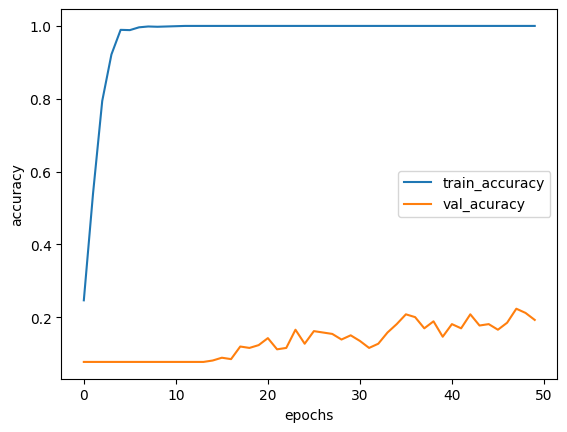

In [15]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [16]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 50th epoch the validation accuracy has reached 0.1923


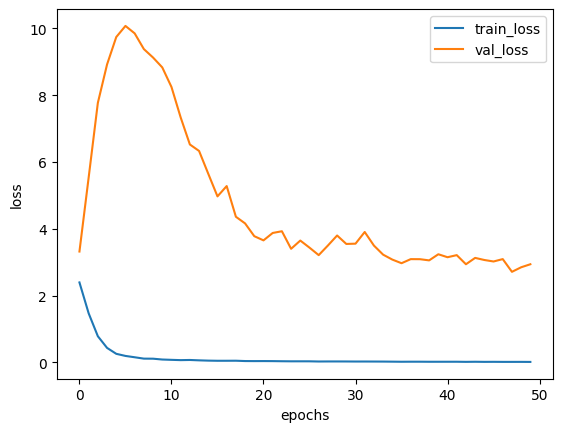

In [17]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [18]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 50th epoch the validation loss has decreased to 2.9393


In [13]:
model.save('models/baseCNN_reluAdam_second.h5')

In [14]:
model.save('models/baseCNN_reluAdam_second.keras')

In [20]:
valid_pred1 = model.predict(valid_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 907ms/step


In [21]:
valid_pred1.shape

(260, 13)

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
valid_pred_labels1 = valid_pred1.argmax(axis=1)

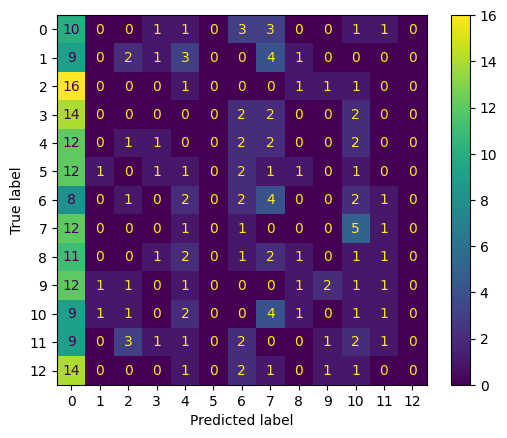

In [24]:
ConfusionMatrixDisplay(confusion_matrix(valid_data.labels, valid_pred_labels1)).plot()

In [1]:
# Import packages
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

tf.keras.backend.set_floatx('float64')

# Define random seed for whole notebook
RSEED=42

In [9]:
# Load the saved model
with tf.device('/cpu:0'):
    new_large_model = tf.keras.models.load_model(r'../models/baseCNN_reluAdam.keras')

# Check its architecture
new_large_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 416, 416, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 208, 208, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 208, 208, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 104, 104, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,353,116 (169.19 MB)

 Trainable params: 22,176,557 (84.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,176,559 (84.60 MB)

In [11]:
valid_pred = new_large_model.predict(valid_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


In [12]:
valid_pred.shape

(260, 13)

In [13]:
valid_data.labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
valid_pred_labels = valid_pred.argmax(axis=1)

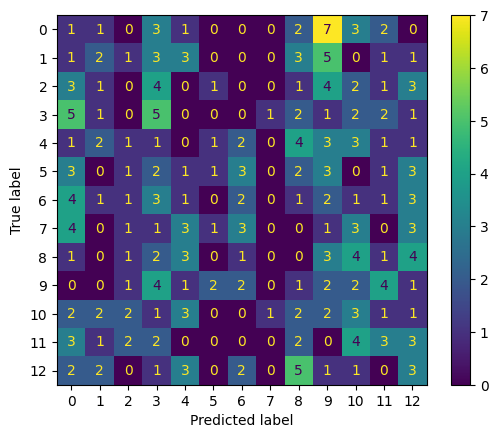

In [28]:
ConfusionMatrixDisplay(confusion_matrix(valid_data.labels, valid_pred_labels)).plot()

In [14]:
valid_pred[0]

array([9.9999571e-01, 4.8459724e-14, 8.3485519e-13, 3.1063987e-08,
       9.0830815e-10, 4.3550152e-08, 1.4888022e-07, 1.2463351e-10,
       4.8519709e-08, 3.6018858e-11, 8.9833363e-11, 1.5129867e-10,
       4.0318732e-06], dtype=float32)

In [21]:
valid_pred[2].argmax()

4

In [15]:
valid_pred[0].argmax()

0

In [31]:
# Load the saved model
with tf.device('/cpu:0'):
    new_large_model1 = tf.keras.models.load_model('../models/canhealth_VGG16.keras')

# Check its architecture
new_large_model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 416, 416, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 13, 13, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │     1,038,348 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,753,036 (60.09 MB)

 Trainable params: 1,038,348 (3.96 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
pred_valid_vgg = new_large_model1.predict(valid_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 534s 55s/step


In [35]:
valid_pred_labels_vgg = pred_valid_vgg.argmax(axis=1)

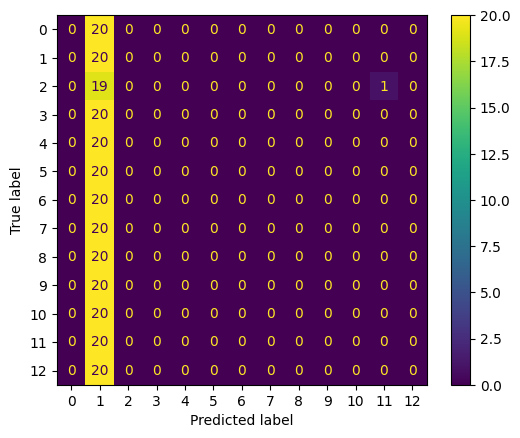

In [36]:
ConfusionMatrixDisplay(confusion_matrix(valid_data.labels, valid_pred_labels_vgg)).plot()